# Data Exploration from Cleaned Data

## Setup

Previously we cleaned the video_metrics_df and video_comments_df tables and uploaded them to Google's BigQuery platform. This platform allows us to utilize the cloud to perform SQL operations.

First we need to install and import Google's BigQuery library which allows us to call the API and access the uploaded data.

Next, a Google service account needs to be created to access the BigQuery database we created. To do that I followed the insturctions [here](https://cloud.google.com/bigquery/docs/quickstarts/quickstart-client-libraries).

We can confirm that the BigQuery API is working by previewing writing a SQL command to preview all the rows of the video_metrics_cleaned table.

In [3]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import config as cfg
import os

sa_credentials = 'gpc/youtube-scraper-404402-a6dc21ea107a.json' # download from service_account page
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = sa_credentials

credentials = service_account.Credentials.from_service_account_file(
    sa_credentials, scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

query_string = """

SELECT * FROM youtube-scraper-404402.yt_data.video_metrics_cleaned LIMIT 5

"""

bq_client = bigquery.Client(credentials=credentials, project=credentials.project_id)
df = bq_client.query(query_string).to_dataframe()

df

,int64_field_0,channel_name,video_id,title,published_at,description,thumbnail_url,tags,category_id,duration,view_count,like_count,fav_count,comment_count
0,3,Why I Salty,K3s5zrG4t1c,"Got a Job for you, 621: Mission 11 | Armored C...",2023-11-12 05:00:08+00:00,#armoredcore6 #bobthebuilder \n\nAI can only d...,https://i.ytimg.com/vi/K3s5zrG4t1c/default.jpg,"['armored core', 'Gundam', 'Anime', 'ac6', 'Ga...",20,PT1M23S,4829,549,0,50
1,4,Why I Salty,HypJk4azqAE,Pepperidge Farm Remember | Armored Core VI,2023-11-11 03:58:05+00:00,#armoredcore6 #familyguy #asmongold \n\nJust t...,https://i.ytimg.com/vi/HypJk4azqAE/default.jpg,"['armored core', 'Gundam', 'Anime', 'ac6', 'Ga...",20,PT22S,2524,239,0,24
2,14,Why I Salty,tsmFLhITvGY,"Got a Job for you, 621: Mission 10 | Armored C...",2023-11-04 04:00:25+00:00,#armoredcore6 @SpongeBobOfficial \n\nDecided t...,https://i.ytimg.com/vi/tsmFLhITvGY/default.jpg,"['armored core', 'Gundam', 'Anime', 'ac6', 'Ga...",20,PT2M3S,7127,613,0,37
3,17,Why I Salty,qls8YCcN8T4,WE DID IT! Asmongold Reacted to EP3,2023-11-01 21:05:17+00:00,#armoredcore6 #asmongold #mcdonalds \n\nI neve...,https://i.ytimg.com/vi/qls8YCcN8T4/default.jpg,"['armored core', 'Gundam', 'Anime', 'ac6', 'Ga...",20,PT8M37S,6187,912,0,61
4,19,Why I Salty,Hv_dkdAp8SQ,Not Part of Your World | Armored Core VI,2023-11-01 05:36:37+00:00,"#armoredcore6 \n\nWhen i made the meme ""Booty ...",https://i.ytimg.com/vi/Hv_dkdAp8SQ/default.jpg,"['armored core', 'Gundam', 'Anime', 'ac6', 'Ga...",20,PT1M29S,9400,939,0,91


## Data Exploration by SQL

Now let's look at a couple queries:
1. What is the average view count based on category?
2. How many views, likes, and comments did videos gain per year?
3. What are the top 10 videos by views?
4. How many viewers have commented on multiple videos?

In [5]:
query_string = """
SELECT 
    REPLACE(), 
    COUNT(*) AS total_videos,
    AVG(view_count) AS average_views,
    AVG(like_count) AS average_likes,
    AVG(comment_count) AS average_total_comments
FROM youtube-scraper-404402.yt_data.video_metrics_cleaned
GROUP BY category_id
"""
bq_client.query(query_string).to_dataframe()

,category_id,total_videos,average_views,average_likes,average_total_comments
0,20,502,2345.304781,147.88247,11.669323
1,24,6,167.000000,12.50000,1.333333


In [20]:
query_string = """
SELECT 
    EXTRACT(YEAR FROM published_at) AS publish_year,
    COUNT(*) AS total_videos,
    SUM(view_count) AS total_views,
    SUM(like_count) AS total_likes,
    SUM(fav_count) AS total_favs,
    SUM(comment_count) as total_comments
FROM youtube-scraper-404402.yt_data.video_metrics_cleaned
GROUP BY publish_year
ORDER BY publish_year
"""
bq_client.query(query_string).to_dataframe()

,publish_year,total_videos,total_views,total_likes,total_favs,total_comments
0,2019,30,8683,247,0,35
1,2020,138,55676,1712,0,406
2,2021,103,45974,1615,0,254
3,2022,78,39075,1550,0,241
4,2023,159,1028937,69188,0,4930


In [28]:
query_string = """
SELECT 
    title,
    view_count
FROM youtube-scraper-404402.yt_data.video_metrics_cleaned
ORDER BY view_count DESC
LIMIT 10
"""
bq_client.query(query_string).to_dataframe()

,title,view_count
0,Raven Don't Listen to Ayre (A.I Voice Test).,169898
1,Raven Please... | Armored Core VI,107156
2,"Your Next Target, 621 | Asmongold Reacts",66195
3,"Got a Job for you, 621: Mission 1 | Armored Co...",61226
4,"Got a Job for you, 621: Mission 2 | Armored Co...",59181
5,"Got a Job for you, 621: Mission 0 | Armored Co...",56188
6,Booty Call | Armored Core VI,36502
7,Express Delivery | Armored Core VI,34016
8,Was it worth it Raven? | Armored Core VI,31429
9,Hey Buddy | Armored Core VI,28623


In [39]:
query_string = """
SELECT 
    video_comment_user,
    COUNT(video_comment_user) AS total_comments,
    COUNT(DISTINCT video_id) AS number_of_videos
FROM youtube-scraper-404402.yt_data.video_comments_cleaned
WHERE video_comment_user <> 'Why I Salty'
GROUP BY video_comment_user
ORDER BY total_comments DESC
LIMIT 10
"""
bq_client.query(query_string).to_dataframe()

,video_comment_user,total_comments,number_of_videos
0,jPaolo,70,63
1,taylormadetactics,48,42
2,Dizzy[sic],46,40
3,Mirage Nikita,25,18
4,Yossa,25,21
5,Eternal &Misery,25,22
6,HonzaLuH,21,17
7,Harold Thomas,14,9
8,ÇakmakÇakmak,14,11
9,naniii?,14,14


## Data Exploration by Pandas/Matplotlib

Now let's read in both files as Pandas dataframes and plot some comparisons between metrics.

In [40]:
query_string = """
SELECT 
    *
FROM youtube-scraper-404402.yt_data.video_metrics_cleaned
"""
video_metrics_df = bq_client.query(query_string).to_dataframe()

query_string = """
SELECT 
    *
FROM youtube-scraper-404402.yt_data.video_comments_cleaned
"""
video_comments_df = bq_client.query(query_string).to_dataframe()

How do the video metrics correlate with each other? How are they distributed?

In [91]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1, 'Channel Video Metrics')

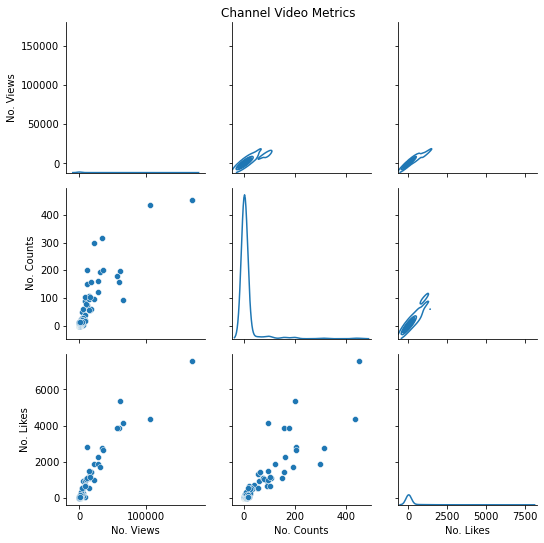

In [155]:

plot_df = video_metrics_df[['view_count', 'comment_count', 'like_count']].copy()
plot_df = plot_df.astype('float64')
g = sns.PairGrid(plot_df)
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

g.axes[0,0].set_ylabel('No. Views')
g.axes[1,0].set_ylabel('No. Comments')
g.axes[2,0].set_ylabel('No. Likes')

g.axes[2,0].set_xlabel('No. Views')
g.axes[2,1].set_xlabel('No. Comments')
g.axes[2,2].set_xlabel('No. Likes')

g.fig.suptitle('Channel Video Metrics', y=1)

There seem to be some extreme outliers, does standardizing the data help?

In [183]:
from scipy import stats
import numpy as np

for col in plot_df:
    z_score = stats.zscore(plot_df[col].values)
    plot_df[f'{col}_zscore'] = z_score
    print(f'z score generated for {col}')

z score generated for view_count
z score generated for comment_count
z score generated for like_count
z score generated for view_count_zscore
z score generated for comment_count_zscore
z score generated for like_count_zscore


Text(0.5, 1, 'Channel Video Metrics (Scaled)')

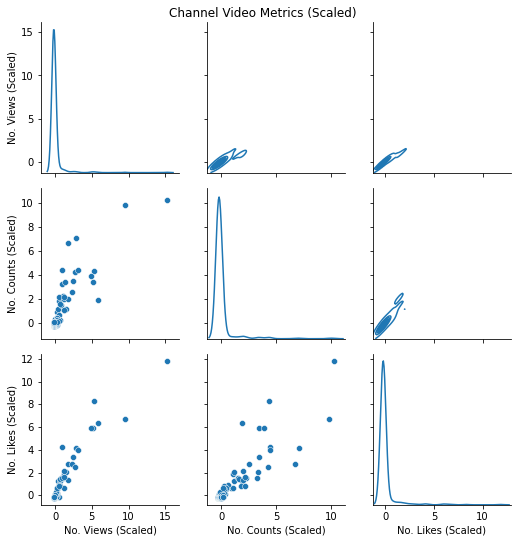

In [154]:
vars = ['view_count_zscore', 'comment_count_zscore', 'like_count_zscore']
g = sns.PairGrid(plot_df, vars=vars)
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

g.axes[0,0].set_ylabel('No. Views (Scaled)')
g.axes[1,0].set_ylabel('No. Comments (Scaled)')
g.axes[2,0].set_ylabel('No. Likes (Scaled)')

g.axes[2,0].set_xlabel('No. Views (Scaled)')
g.axes[2,1].set_xlabel('No. Comments (Scaled)')
g.axes[2,2].set_xlabel('No. Likes (Scaled)')
g.fig.suptitle('Channel Video Metrics (Scaled)', y=1)

As expected, video metrics are stronlgy correlated with one another and likely reflects viewer engagement.

Can we get a sense of how views are distributed between videos with engagement (viewer comments) vs. non-engagement? (no viewer comments).

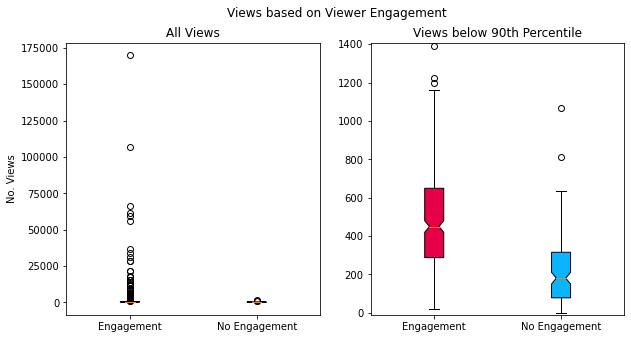

In [209]:
engaged_viewship = [
    plot_df[plot_df['comment_count'] > 0]['view_count'].values,
    plot_df[plot_df['comment_count'] == 0]['view_count'].values
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

bplot1 = ax1.boxplot(engaged_viewship, patch_artist=True, notch=True)
ax1.set_xticklabels(['Engagement', 'No Engagement'])

bplot2= ax2.boxplot(engaged_viewship, patch_artist=True, notch=True)
ax2.set_xticklabels(['Engagement', 'No Engagement'])

colors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plot_min = np.min([x for sublist in engaged_viewship for x in sublist])
plot_max = np.quantile([x for sublist in engaged_viewship for x in sublist], 0.9)

ax2.set_ylim(plot_min-10,plot_max)
ax1.set_ylabel('No. Views')

ax1.set_title('All Views')
ax2.set_title('Views below 90th Percentile')

fig.suptitle('Views based on Viewer Engagement')

plt.show()

Interestingly there doesn't seem to be a clear separation in views between videos with or without user engagement. Perhaps there are other factors that contribute to this that requires further refinement of the data.